In [6]:
# Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [7]:
def load_training_data(file_path):
    # Opens file
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    # Variables to keep track of the data
    data = []
    labels = []
    current_digit = 0
    current_block = []
    blocks_counter = 0

    for line in lines:
        # If the line is not blank
        if line.strip():
            # Get the first 9 coefficients
            coefficients = list(map(float, line.split()))[:9]
            current_block.append(coefficients)
        # If its the end of a block
        else:
            if current_block:
                # Gets the average of the block
                avr_vector = np.mean(current_block, axis=0)
                data.append(avr_vector)
                labels.append(current_digit)

                # Reset the block
                current_block = []
                blocks_counter += 1

            # If its the last block of the digit
            if blocks_counter == 660:
                current_digit += 1
                blocks_counter = 0

    # Adds the last block
    if current_block:
        data.extend(current_block)
        labels.extend([current_digit] * len(current_block))

    return np.array(data), np.array(labels)

In [8]:
# Reads the data
file_path = './data/Train_Arabic_Digit.txt'
data, labels = load_training_data(file_path)

/home/ren11/arabic-digits/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/home/ren11/arabic-digits/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/home/ren11/arabic-digits/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/home/ren11/arabic-digits/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This

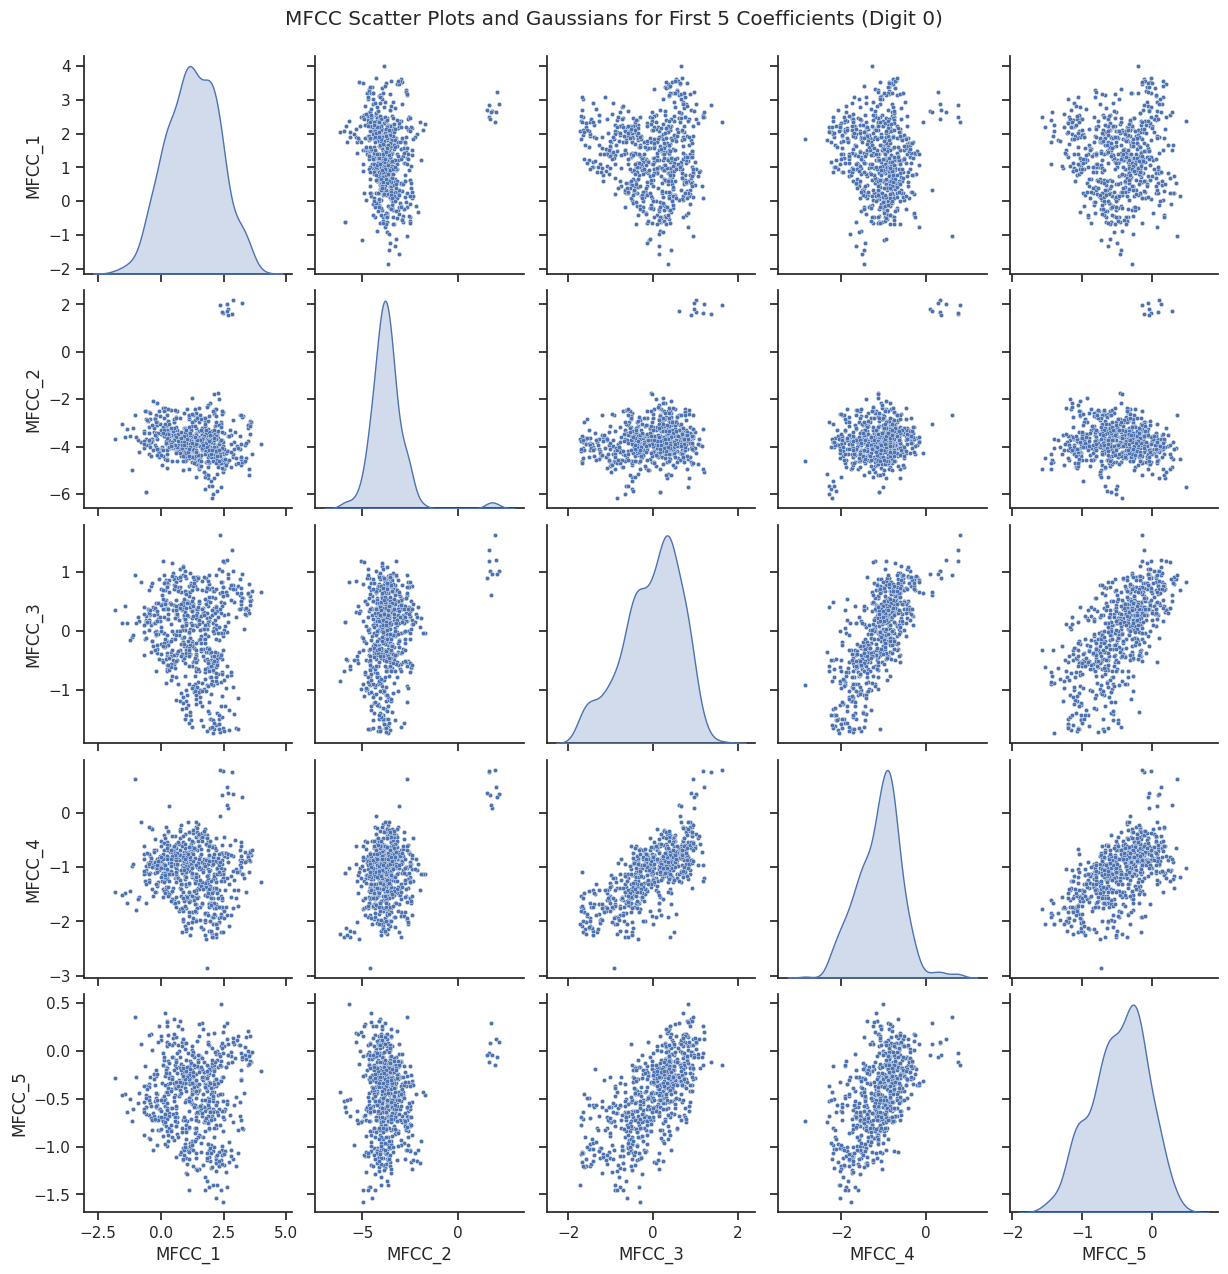

In [10]:
# Filter data for a specific digit (e.g., digit 8)
digit = 0
digit_data = data[labels == digit]

# Create a Pandas DataFrame for the first 6 coefficients
num_coefficients = 5
df = pd.DataFrame(digit_data[:, :num_coefficients], columns=[f"MFCC_{i+1}" for i in range(num_coefficients)])

# Pairplot with KDE (Kernel Density Estimation)
sns.set(style="ticks")
pairplot = sns.pairplot(df, kind="scatter", diag_kind="kde", plot_kws={'s': 10}, diag_kws={'shade': True})

# Add a title to the figure
pairplot.fig.suptitle(f"MFCC Scatter Plots and Gaussians for First {num_coefficients} Coefficients (Digit {digit})", y=1.02)

# Show the plot
plt.show()